In [ ]:
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tickers = ['VALE', 'PETR4.SA', 'BBAS3.SA','ITUB4.SA']
ibov = '^BVSP'

In [ ]:
carteira = yf.download(tickers, start = '2022-01-01', end = '2024-01-01')['Adj Close']

ibov = yf.download('^BVSP', start = '2022-01-01', end = '2024-01-01')['Adj Close']

ibov.to_csv('IBOVESPA.csv')

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira.dropna(inplace = True)
carteira

Ticker,BBAS3.SA,ITUB4.SA,PETR4.SA,VALE
Date,,,,
2022-01-03 00:00:00+00:00,11.837366,18.595182,12.382774,11.113053
2022-01-04 00:00:00+00:00,11.849686,19.122526,12.429600,10.903829
2022-01-05 00:00:00+00:00,11.652534,18.759434,11.948589,10.992347
2022-01-06 00:00:00+00:00,11.747003,19.139809,11.940075,11.273995
2022-01-07 00:00:00+00:00,11.759323,19.563410,11.995412,11.917765
...,...,...,...,...
2023-12-21 00:00:00+00:00,25.703798,30.867674,32.056648,14.553047
2023-12-22 00:00:00+00:00,25.774813,31.357182,32.364975,14.525361
2023-12-26 00:00:00+00:00,26.011541,31.677250,32.884716,14.700700


In [ ]:
carteira_normalizada = (carteira/ carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace = True)

In [ ]:
carteira.describe()

Ticker,BBAS3.SA,ITUB4.SA,PETR4.SA,VALE
count,483.000000,483.000000,483.000000,483.000000
mean,18.240371,23.760498,19.914505,12.869069
std,3.645585,2.517144,5.657959,1.520566
min,11.652534,18.595182,11.923052,10.002553
25%,14.982027,21.948158,15.508458,11.660484
50%,17.690531,23.420469,17.893064,12.563750
75%,21.964898,25.391975,24.162318,13.927179
max,26.224596,31.978493,32.911144,17.084005


In [ ]:
ibov.describe()

Ticker,^BVSP
count,498.000000
mean,111897.323293
std,7233.468461
min,96121.000000
25%,107175.250000
50%,111889.000000
75%,116723.000000
max,134194.000000


<Figure size 1800x800 with 0 Axes>

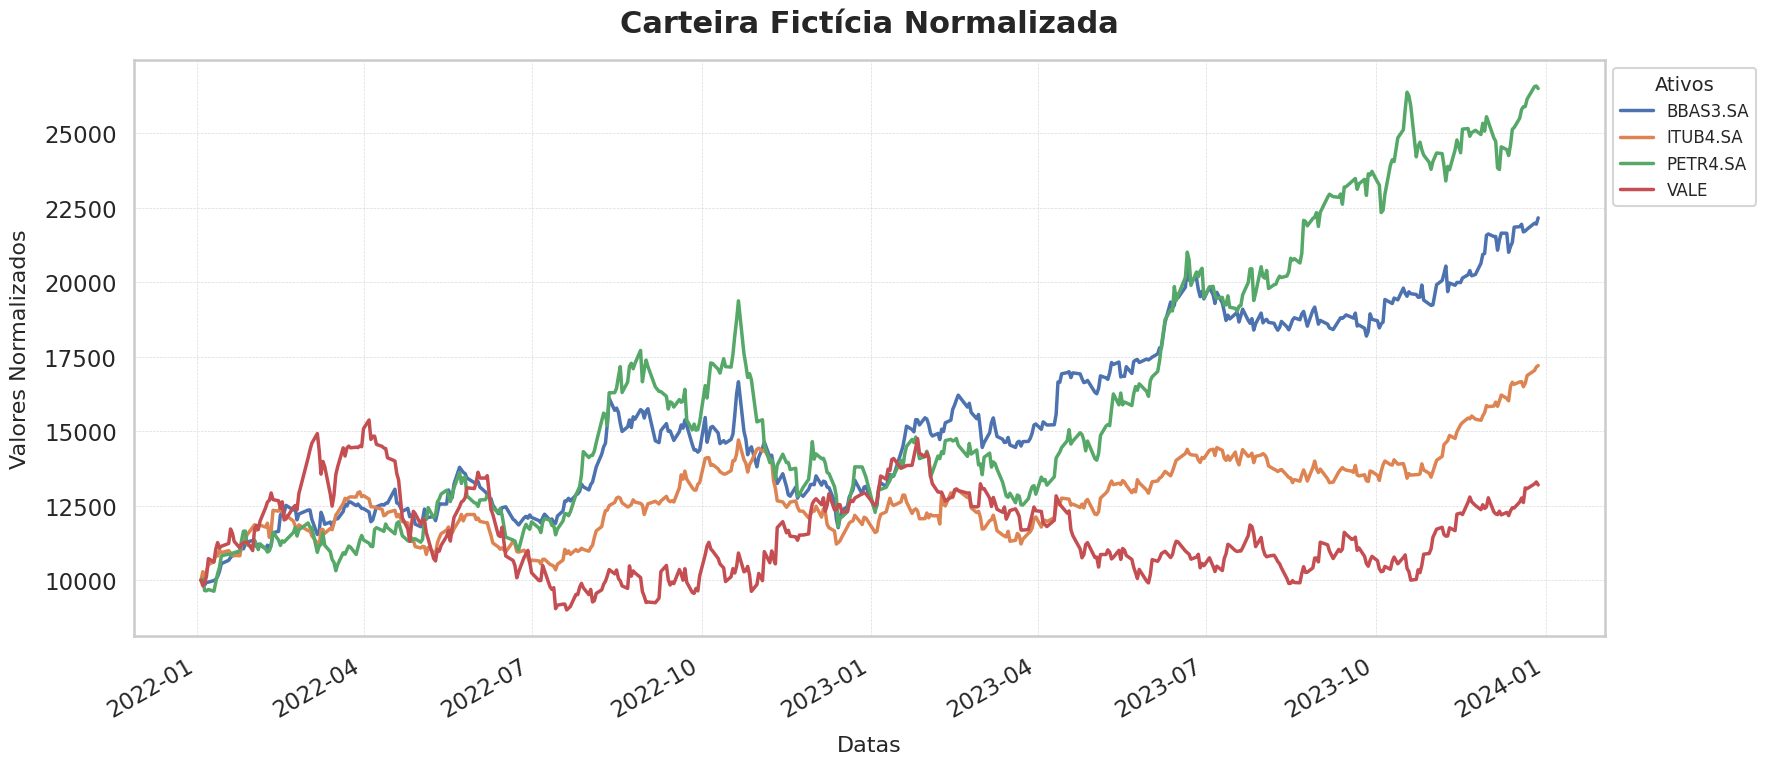

In [ ]:
# Ajustar configurações globais de estilo
sns.set_theme(style="whitegrid", context="talk")  # Estilo elegante e fonte grande

# Plotar o gráfico
plt.figure(figsize=(18, 8))
ax = carteira_normalizada.plot(
    figsize=(18, 8),
    color=sns.color_palette("deep", len(carteira_normalizada.columns)),
    linewidth=2.5
)

# Adicionar título e rótulos
plt.title("Carteira Fictícia Normalizada", fontsize=22, weight="bold", pad=20)
plt.xlabel("Datas", fontsize=16, labelpad=10)
plt.ylabel("Valores Normalizados", fontsize=16, labelpad=10)

# Adicionar grade suave
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Ajustar legenda
plt.legend(title="Ativos", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Salvar o gráfico com alta resolução
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.savefig("carteira_ficticia_storytelling.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis = 1)
carteira_normalizada

Ticker,BBAS3.SA,ITUB4.SA,PETR4.SA,VALE,saldo
Date,,,,,
2022-01-03 00:00:00+00:00,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2022-01-04 00:00:00+00:00,10010.407353,10283.591598,10037.814958,9811.730678,40143.544587
2022-01-05 00:00:00+00:00,9843.857478,10088.330044,9649.363692,9891.383084,39472.934298
2022-01-06 00:00:00+00:00,9923.662492,10292.885665,9642.487685,10144.822555,40003.858397
2022-01-07 00:00:00+00:00,9934.070651,10520.687221,9687.176339,10724.113633,40866.047845
...,...,...,...,...,...
2023-12-21 00:00:00+00:00,21714.119567,16599.823104,25888.098531,13095.453390,77297.494593
2023-12-22 00:00:00+00:00,21774.111294,16863.067456,26137.095010,13070.540238,77844.813999
2023-12-26 00:00:00+00:00,21974.095536,17035.191801,26556.824098,13228.317529,78794.428965


In [ ]:
ibov_normalizado = (ibov/ibov.iloc[0])*50000
ibov_normalizado

Ticker,^BVSP
Date,
2022-01-03 00:00:00+00:00,50000.000000
2022-01-04 00:00:00+00:00,49803.698928
2022-01-05 00:00:00+00:00,48597.024692
2022-01-06 00:00:00+00:00,48864.051885
2022-01-07 00:00:00+00:00,49421.200516
...,...
2023-12-21 00:00:00+00:00,63596.736014
2023-12-22 00:00:00+00:00,63871.461288
2023-12-26 00:00:00+00:00,64246.742749


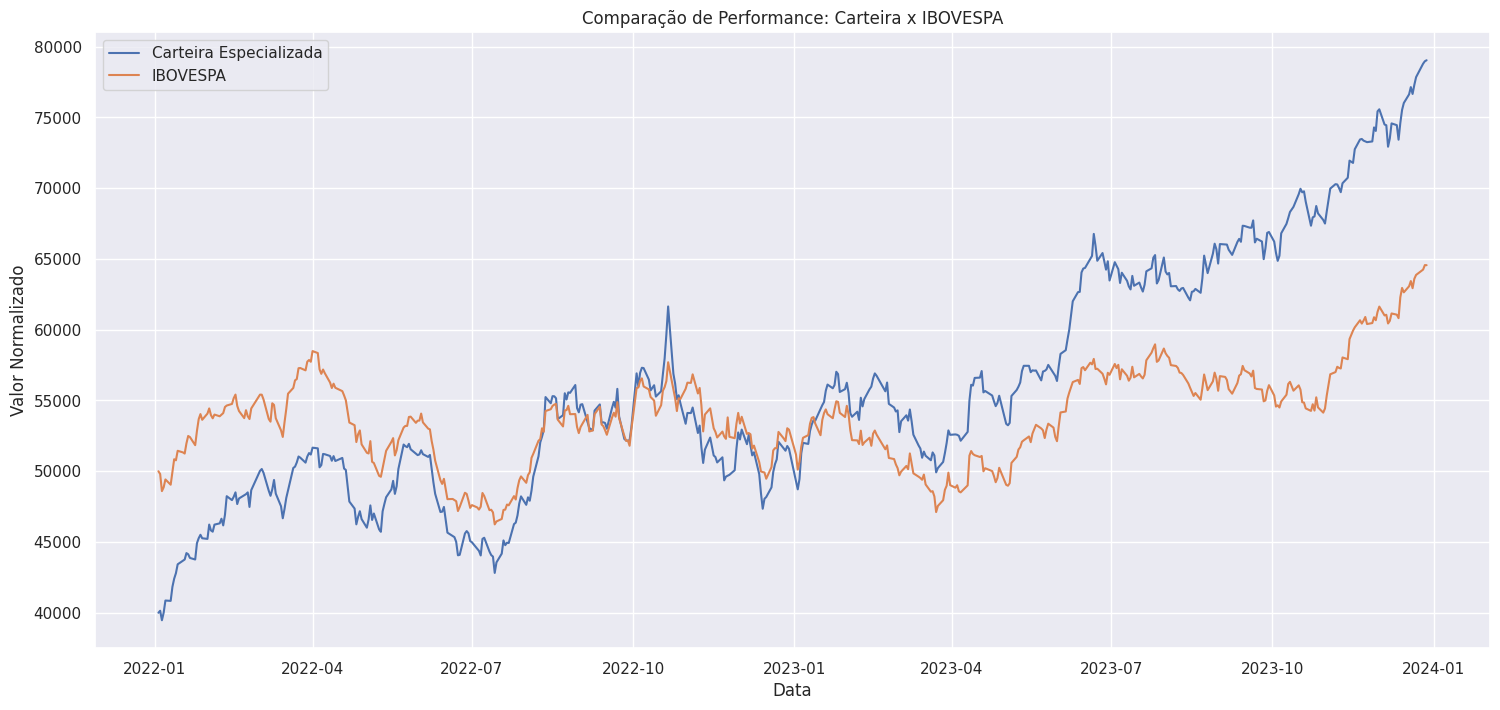

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(carteira_normalizada['saldo'], label='Carteira Especializada')
plt.plot(ibov_normalizado, label='IBOVESPA')


plt.title('Comparação de Performance: Carteira x IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True)
plt.savefig('carteiraficticiaXibovespa.png', dpi = 300)
plt.show();



In [ ]:
ticker = '^BVSP'
data = yf.Ticker(ticker)
data = data.history(start = '2022-01-01', end = '2024-01-01')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-03:00,104823.0,106125.0,103413.0,103922.0,11128500,0.0,0.0
2022-01-04 00:00:00-03:00,103922.0,104276.0,103096.0,103514.0,11491600,0.0,0.0
2022-01-05 00:00:00-03:00,103514.0,103514.0,100850.0,101006.0,0,0.0,0.0
2022-01-06 00:00:00-03:00,101006.0,102235.0,101000.0,101561.0,11749200,0.0,0.0
2022-01-07 00:00:00-03:00,101561.0,102719.0,101104.0,102719.0,11733200,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-03:00,130826.0,132277.0,130822.0,132182.0,8681000,0.0,0.0
2023-12-22 00:00:00-03:00,132553.0,133035.0,132094.0,132753.0,8231100,0.0,0.0
2023-12-26 00:00:00-03:00,132753.0,133645.0,132753.0,133533.0,0,0.0,0.0


In [ ]:
decomposicao = seasonal_decompose(data['Close'], model = 'additive', period = 30, extrapolate_trend = 30)
decomposicao

<Axes: xlabel='Date'>

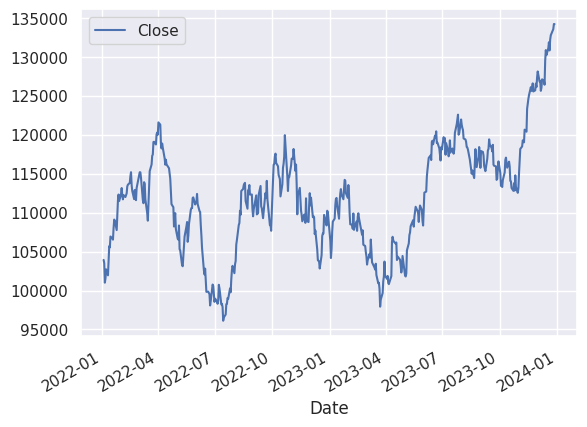

In [ ]:
data[['Close']].plot()

In [ ]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

,0
Date,
2022-01-03 00:00:00-03:00,103922.0
2022-01-04 00:00:00-03:00,103514.0
2022-01-05 00:00:00-03:00,101006.0
2022-01-06 00:00:00-03:00,101561.0
2022-01-07 00:00:00-03:00,102719.0
...,...
2023-12-21 00:00:00-03:00,132182.0
2023-12-22 00:00:00-03:00,132753.0
2023-12-26 00:00:00-03:00,133533.0


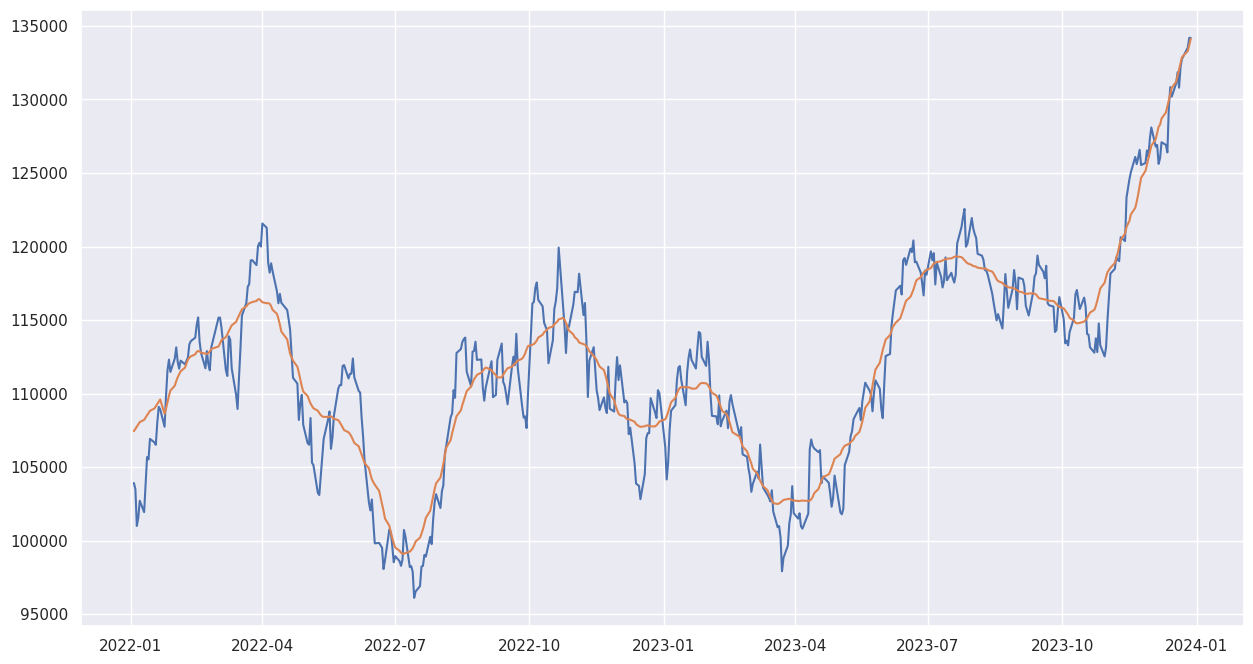

In [ ]:
ax, fig = plt.subplots(figsize = (15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

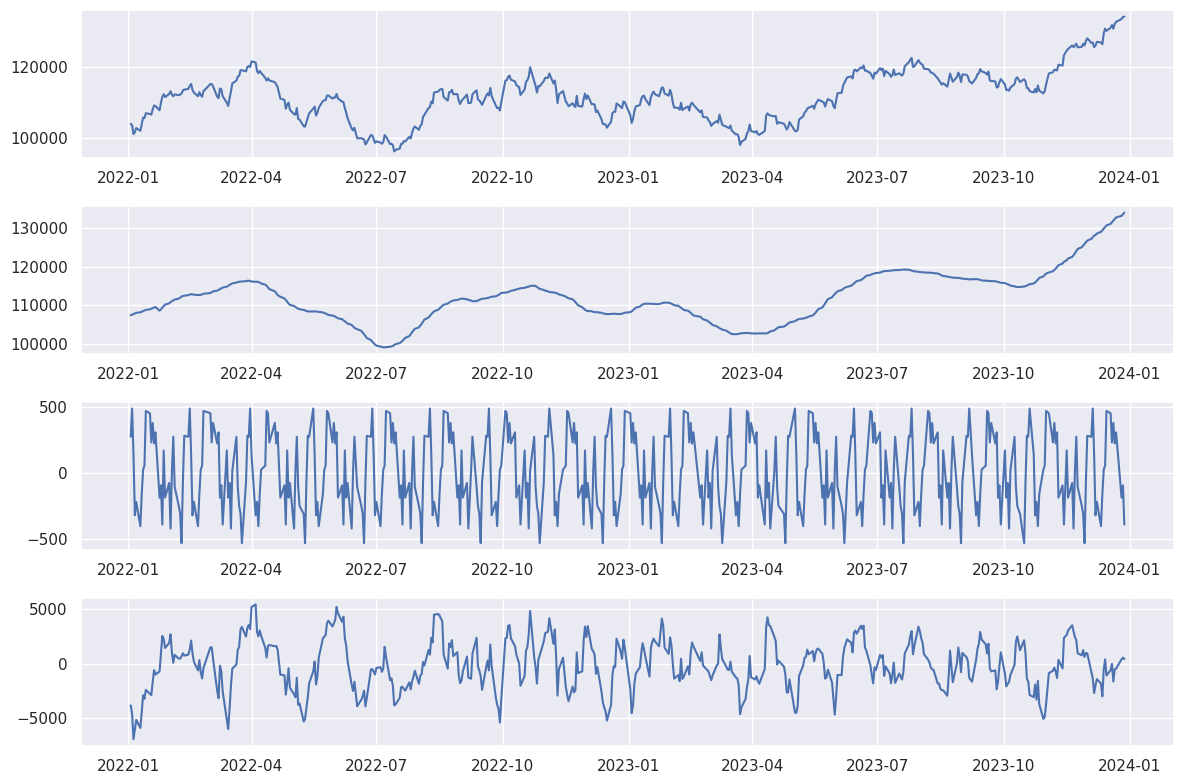

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, figsize = (12,8))
ax1.plot(decomposicao.observed)
ax2.plot(decomposicao.trend)
ax3.plot(decomposicao.seasonal)
ax4.plot(decomposicao.resid)
plt.tight_layout()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498 entries, 2022-01-03 00:00:00-03:00 to 2023-12-28 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          498 non-null    float64
 1   High          498 non-null    float64
 2   Low           498 non-null    float64
 3   Close         498 non-null    float64
 4   Volume        498 non-null    int64  
 5   Dividends     498 non-null    float64
 6   Stock Splits  498 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.1 KB


In [ ]:
data.reset_index(inplace = True)

In [ ]:
data['ano'] = data['Date'].dt.year
data['mes'] = data['Date'].dt.month
data['dia'] = data['Date'].dt.day

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ano,mes,dia
0,2022-01-03 00:00:00-03:00,104823.0,106125.0,103413.0,103922.0,11128500,0.0,0.0,2022,1,3
1,2022-01-04 00:00:00-03:00,103922.0,104276.0,103096.0,103514.0,11491600,0.0,0.0,2022,1,4
2,2022-01-05 00:00:00-03:00,103514.0,103514.0,100850.0,101006.0,0,0.0,0.0,2022,1,5
3,2022-01-06 00:00:00-03:00,101006.0,102235.0,101000.0,101561.0,11749200,0.0,0.0,2022,1,6
4,2022-01-07 00:00:00-03:00,101561.0,102719.0,101104.0,102719.0,11733200,0.0,0.0,2022,1,7


In [ ]:
data.drop(columns = ['Open', 'High', 'Low','Dividends','Stock Splits'], inplace = True)
data['rentabilidade'] = data['Close']/data['Close'].shift()*100-100

In [ ]:
data.head()

,Date,Close,Volume,ano,mes,dia,rentabilidade
0,2022-01-03 00:00:00-03:00,103922.0,11128500,2022,1,3,NaN
1,2022-01-04 00:00:00-03:00,103514.0,11491600,2022,1,4,-0.392602
2,2022-01-05 00:00:00-03:00,101006.0,0,2022,1,5,-2.422861
3,2022-01-06 00:00:00-03:00,101561.0,11749200,2022,1,6,0.549472
4,2022-01-07 00:00:00-03:00,102719.0,11733200,2022,1,7,1.140201


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype                            
---  ------         --------------  -----                            
 0   Date           498 non-null    datetime64[ns, America/Sao_Paulo]
 1   Close          498 non-null    float64                          
 2   Volume         498 non-null    int64                            
 3   ano            498 non-null    int32                            
 4   mes            498 non-null    int32                            
 5   dia            498 non-null    int32                            
 6   rentabilidade  497 non-null    float64                          
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(2), int32(3), int64(1)
memory usage: 21.5 KB


In [ ]:
data.describe()

,Close,Volume,ano,mes,dia,rentabilidade
count,498.000000,4.980000e+02,498.000000,498.000000,498.000000,497.000000
mean,111897.323293,1.231702e+07,2022.497992,6.491968,15.817269,0.058795
std,7233.468461,3.492069e+06,0.500499,3.426277,8.768929,1.214781
min,96121.000000,0.000000e+00,2022.000000,1.000000,1.000000,-3.350062
25%,107175.250000,1.059792e+07,2022.000000,3.250000,8.000000,-0.647848
50%,111889.000000,1.213545e+07,2022.000000,7.000000,16.000000,0.023519
75%,116723.000000,1.413542e+07,2023.000000,9.000000,23.000000,0.825990
max,134194.000000,2.602930e+07,2023.000000,12.000000,31.000000,5.540864
